In [1]:
import pandas as pd

# Using this library for chart creation:
import matplotlib.pyplot as plt

# Openning our table:
df_yearly = pd.read_csv('D:\\Desktop\\Study\\100 Days of Code - The Complete Python Pro Bootcamp for 2021\\DATA\\The Tragic Discovery of Handwashing t-Tests & Distributions\\annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('D:\\Desktop\\Study\\100 Days of Code - The Complete Python Pro Bootcamp for 2021\\DATA\\The Tragic Discovery of Handwashing t-Tests & Distributions\\monthly_deaths.csv')

Today you will become a doctor, but not just any doctor. You will become Dr Ignaz Semmelweis, a Hungarian physician born in 1818 who worked in the Vienna General Hospital.
In the past, people didn't know about bacteria, germs, or viruses. People illness was caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Dr Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., puerperal fever).

# Today's lesson':

How to make a compelling argument using data

How to superimpose histograms to show differences in distributions

How to use a Kernel Density Estimate (KDE) to show a graphic estimate of a distribution.

How to use scipy and test for statistical significance by looking at p-values.

How to highlight different parts of a time series chart in Matplotib.

How to add and configure a Legend in Matplotlib.

Use NumPy's .where() function to process elements depending on a condition.



In [5]:
df_yearly.head()

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

In [7]:
df_monthly.head()

date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2

# Preliminary Data Exploration and Visualising Births & Deaths at Vienna Hospital

You (aka Dr Semmelweis) are working at Vienna General Hospital. Let's take a closer look at the data you've been collecting on the number of births and maternal deaths throughout the 1840s.

# What is the shape of df_yearly and df_monthly? How many rows and columns?

In [10]:
print(f"There are {df_yearly.shape[0]} rows and {df_yearly.shape[1]} columns in df_yearly DF")

There are 12 rows and 4 columns in df_yearly DF


In [11]:
print(f"There are {df_monthly.shape[0]} rows and {df_monthly.shape[1]} columns in df_monthly DF")

There are 98 rows and 3 columns in df_monthly DF


# What are the column names?

In [12]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [13]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


# Which years are included in the dataset?

In [14]:
df_yearly.head(1)

year  births  deaths    clinic
0  1841    3036     237  clinic 1

In [15]:
df_yearly.tail(1)

year  births  deaths    clinic
11  1846    3754     105  clinic 2

# Are there any NaN values or duplicates?

In [17]:
df_yearly.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [19]:
print(f'Any duplicates? {df_yearly.duplicated().values.any()}')

Any duplicates? False


In [18]:
df_monthly.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

In [20]:
print(f'Any duplicates? {df_monthly.duplicated().values.any()}')

Any duplicates? False


In [21]:
df_yearly.isna()

year  births  deaths  clinic
0   False   False   False   False
1   False   False   False   False
2   False   False   False   False
3   False   False   False   False
4   False   False   False   False
5   False   False   False   False
6   False   False   False   False
7   False   False   False   False
8   False   False   False   False
9   False   False   False   False
10  False   False   False   False
11  False   False   False   False

In [23]:
print(f'Any NaN values among the data? {df_yearly.isna().values.any()}')

Any NaN values among the data? False


In [22]:
df_monthly.isna()

date  births  deaths
0   False   False   False
1   False   False   False
2   False   False   False
3   False   False   False
4   False   False   False
..    ...     ...     ...
93  False   False   False
94  False   False   False
95  False   False   False
96  False   False   False
97  False   False   False

[98 rows x 3 columns]

In [24]:
print(f'Any NaN values among the data? {df_monthly.isna().values.any()}')

Any NaN values among the data? False


# What were the average number of births that took place per month?

In [25]:
df_monthly.describe()

births     deaths
count   98.000000  98.000000
mean   267.000000  22.469388
std     41.769372  18.141031
min    190.000000   0.000000
25%    242.500000   8.000000
50%    264.000000  16.500000
75%    292.750000  36.750000
max    406.000000  75.000000

The average number of births is 267. 

# What were the average number of deaths that took place per month?

The average number of births is 22,469 388.

Using .describe() allows us to view some interesting statistics at a glance. We see that on average there were about 267 births and 22.47 deaths per month.

# Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 (source wikipedia).

In [26]:
df_yearly.head(1)

year  births  deaths    clinic
0  1841    3036     237  clinic 1

Childbirth was very risky! About 7.08% of women died 💀 in the 1840s (compared to 0.018% in the US in 2013).

In [30]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob}%')
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.083762852536147%
Chances of dying in the 1840s in Vienna: 7.08%


If someone gave me a bag of 100 M&Ms and told me that 7 of them would kill me, I'd (probably) pass on those M&Ms 🤭. Just saying.

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

Just as in previous notebooks we can use .twinx() to create to y-axes. Then it's just a matter of adding a gird with .grid() and configuring the look of our plots with the color, linewidth, and linestyle parameters.

# Create a Matplotlib chart with twin y-axes.

To get the tickmarks showing up on the x-axis, we need to use mdates and Matplotlib's locators

# Chart with Births and Deaths values:

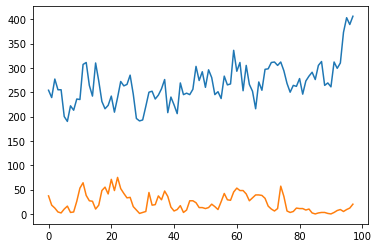

In [2]:
plt.plot(df_monthly.index, df_monthly.births)
plt.plot(df_monthly.index, df_monthly.deaths)

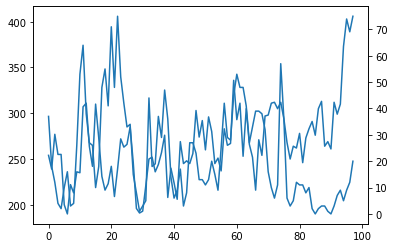

In [3]:
# We need to be able to configure and plot our data on two separate axes on the same chart. 
# This involves getting hold of an axis object from Matplotlib.

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(df_monthly.index, df_monthly.births)
ax2.plot(df_monthly.index, df_monthly.deaths)

In [6]:
# That's very nice! But there's one problem: we can't tell the lines apart because they have the same colour! 
# Let's add some styling. Let's:

# colour in the lines

# colour in the axes and

# add some labels

# so that we can see what's going on. Here's what we get:

Text(0, 0.5, "Month's Deaths")

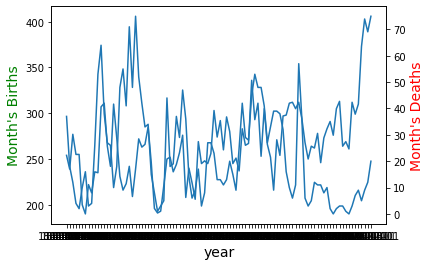

In [4]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(df_monthly.date, df_monthly.births)
ax2.plot(df_monthly.date, df_monthly.deaths)

ax1.set_xlabel("year", fontsize = 14)
ax1.set_ylabel("Month's Births", color="g", fontsize = 14)
ax2.set_ylabel("Month's Deaths", color="r", fontsize = 14)

In [8]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [9]:
print(f'Data Type Date: {type(df_monthly["date"][0])}')

Data Type Date: <class 'str'>


# Converting Strings to Data:

In [2]:
df_monthly.date = pd.to_datetime(df_monthly.date)
print(f'Data Type Date: {type(df_monthly["date"][0])}')

Data Type Date: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


Text(0, 0.5, "Month's Deaths")

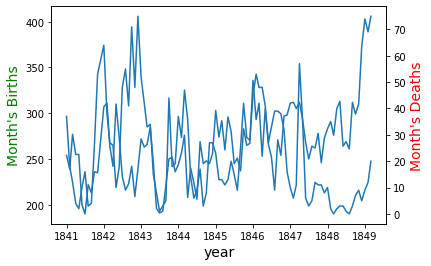

In [6]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(df_monthly.date, df_monthly.births)
ax2.plot(df_monthly.date, df_monthly.deaths)

ax1.set_xlabel("year", fontsize = 14)
ax1.set_ylabel("Month's Births", color="g", fontsize = 14)
ax2.set_ylabel("Month's Deaths", color="r", fontsize = 14)

# Styling the Chart with Monthly Births and Monthly Deaths:

Text(0, 0.5, 'Monthly Deaths')

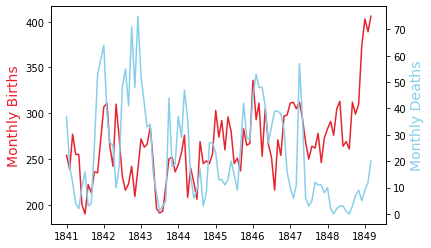

In [7]:
# Now let's style the chart a bit more. In particular, 
# let's check out the different colours you can use with Matplotlib.

# For our updated chart, let's differentiate the two lines and the axis labels using different colours. 
# Using one of the blue colour names for the search volume and a HEX code for a red colour for the stock price:

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(df_monthly.date, df_monthly.births, color='#E6232E')
ax2.plot(df_monthly.date, df_monthly.deaths, color='skyblue')

# ax1.set_xlabel("year",  fontsize = 14)
ax1.set_ylabel("Monthly Births",  color='#E6232E', fontsize = 14) # can use a HEX code
ax2.set_ylabel("Monthly Deaths", color='skyblue', fontsize = 14) # or a named colour

# Increase the Chart:

Text(0, 0.5, 'Monthly Deaths')

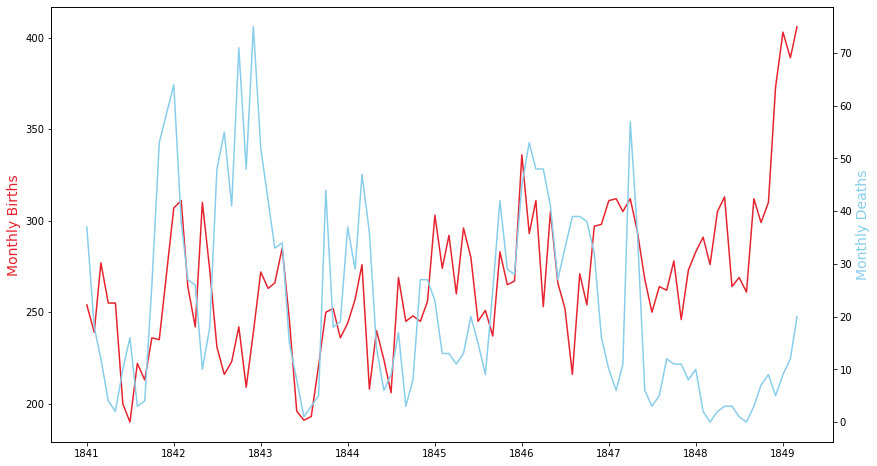

In [9]:
plt.figure(figsize=(14, 8))  # make chart larger

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis


ax1.plot(df_monthly.date, df_monthly.births, color='#E6232E')
ax2.plot(df_monthly.date, df_monthly.deaths, color='skyblue')

# ax1.set_xlabel("year",  fontsize = 14)
ax1.set_ylabel("Monthly Births",  color='#E6232E', fontsize = 14) # can use a HEX code
ax2.set_ylabel("Monthly Deaths", color='skyblue', fontsize = 14) # or a named colour

# Increase the font sizes for the labels and the ticks on the x-axis to 14.

Text(0, 0.5, 'Monthly Deaths')

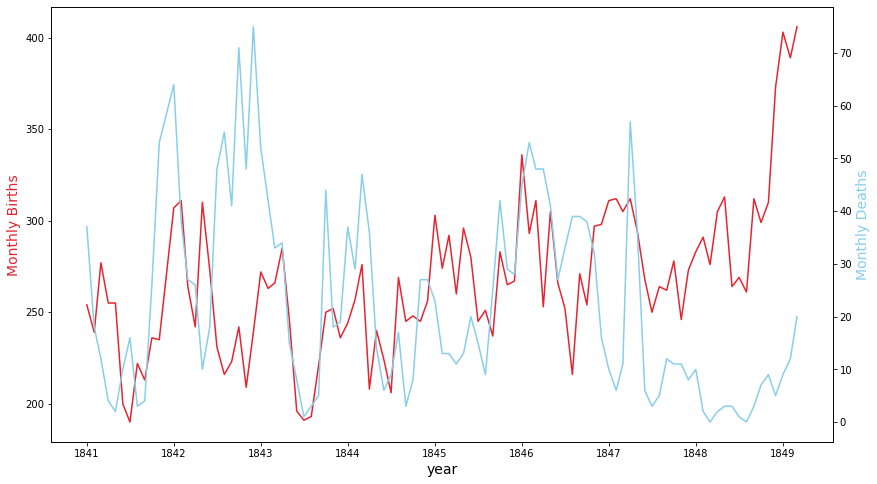

In [10]:
plt.figure(figsize=(14, 8))  # make chart larger

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()  # create another axis that shares the same x-axis


ax1.plot(df_monthly.date, df_monthly.births, color='#E6232E')
ax2.plot(df_monthly.date, df_monthly.deaths, color='skyblue')

ax1.set_xlabel("year",  fontsize = 14)
ax1.set_ylabel("Monthly Births",  color='#E6232E', fontsize = 14) # can use a HEX code
ax2.set_ylabel("Monthly Deaths", color='skyblue', fontsize = 14) # or a named colour

# Adding grid and linestyles:

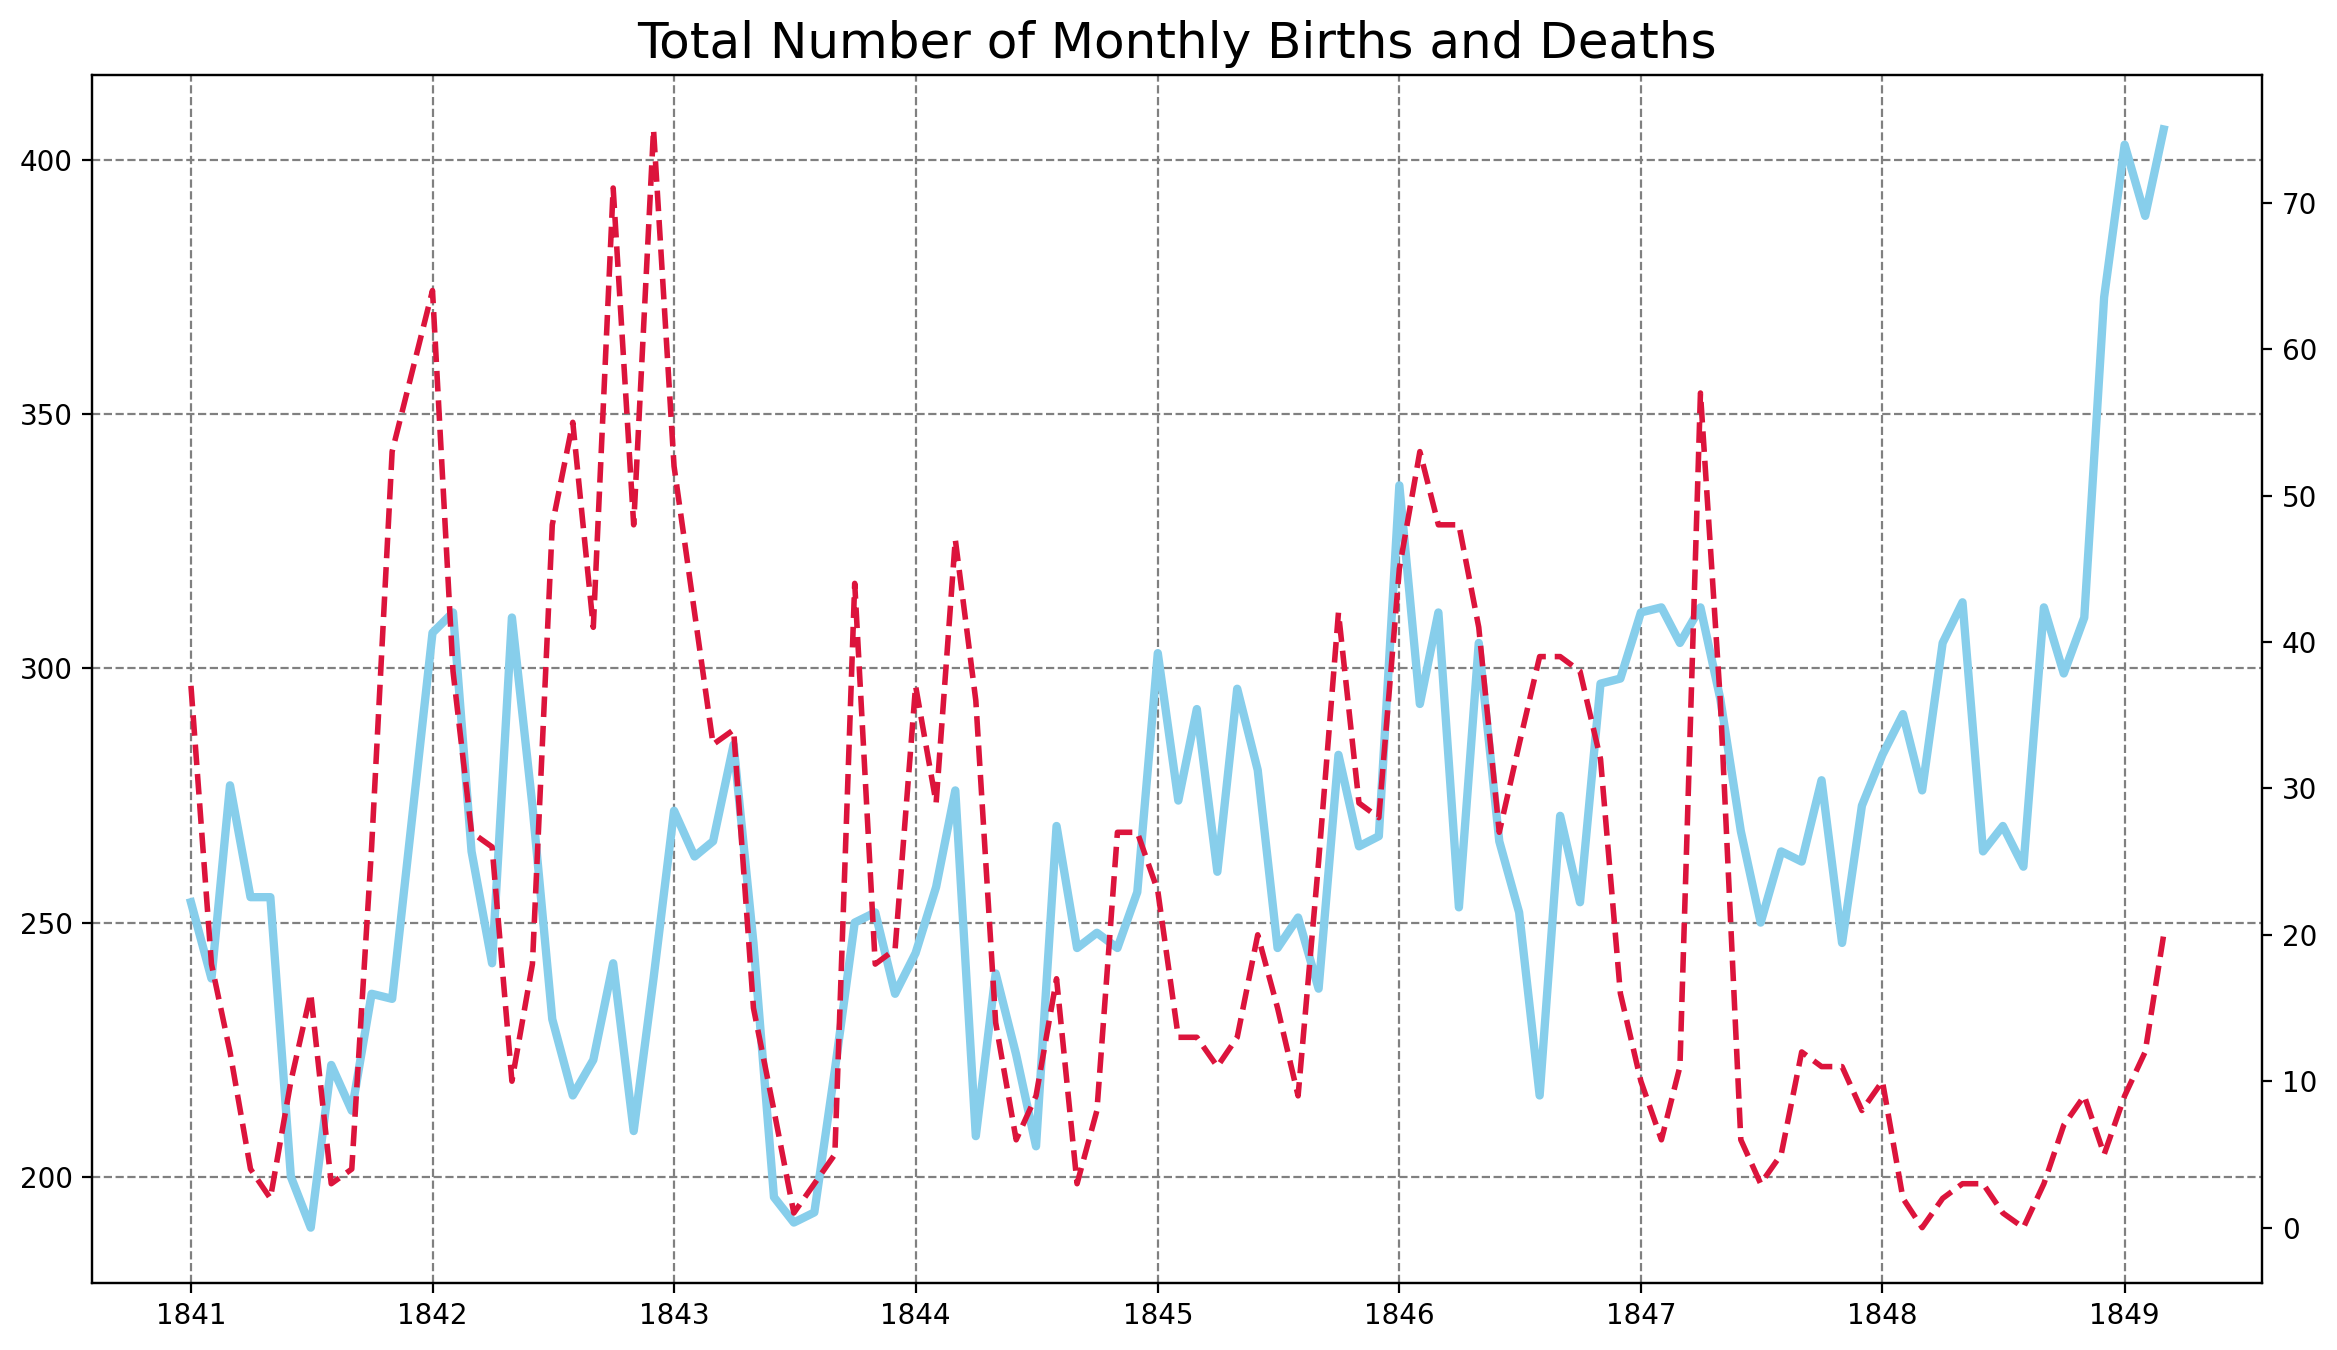

In [11]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

# adding a grid:
ax1.grid(color='grey', linestyle='--')


ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)

# adding line style:
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

# Using Locators and DateFormatters to generate Tick Marks on a Time Line

In [13]:
# # When working with time series, it's often quite difficult to get the tick marks on charts looking the way you want to. 
# This is why we have Locator helpers.
# Using Locators we can change our x-axis.

# Importing matplotlib.dates:

In [14]:
# The first step is importing matplotlib.dates.  This is where all the date plotting capabilities live.

In [35]:
import matplotlib.dates as mdates

In [16]:
# Next, we need a YearLocator() and a MonthLocator() objects, which will help Matplotlib find the years and the months. 
# Then we also need a DateFormatter(), which will help us specify how we want to display the dates.

# Create locators from ticks on the time axis:

In [36]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

In [18]:
# Now we can go back to our chart and format where the major and minor ticks should be using the Locators.

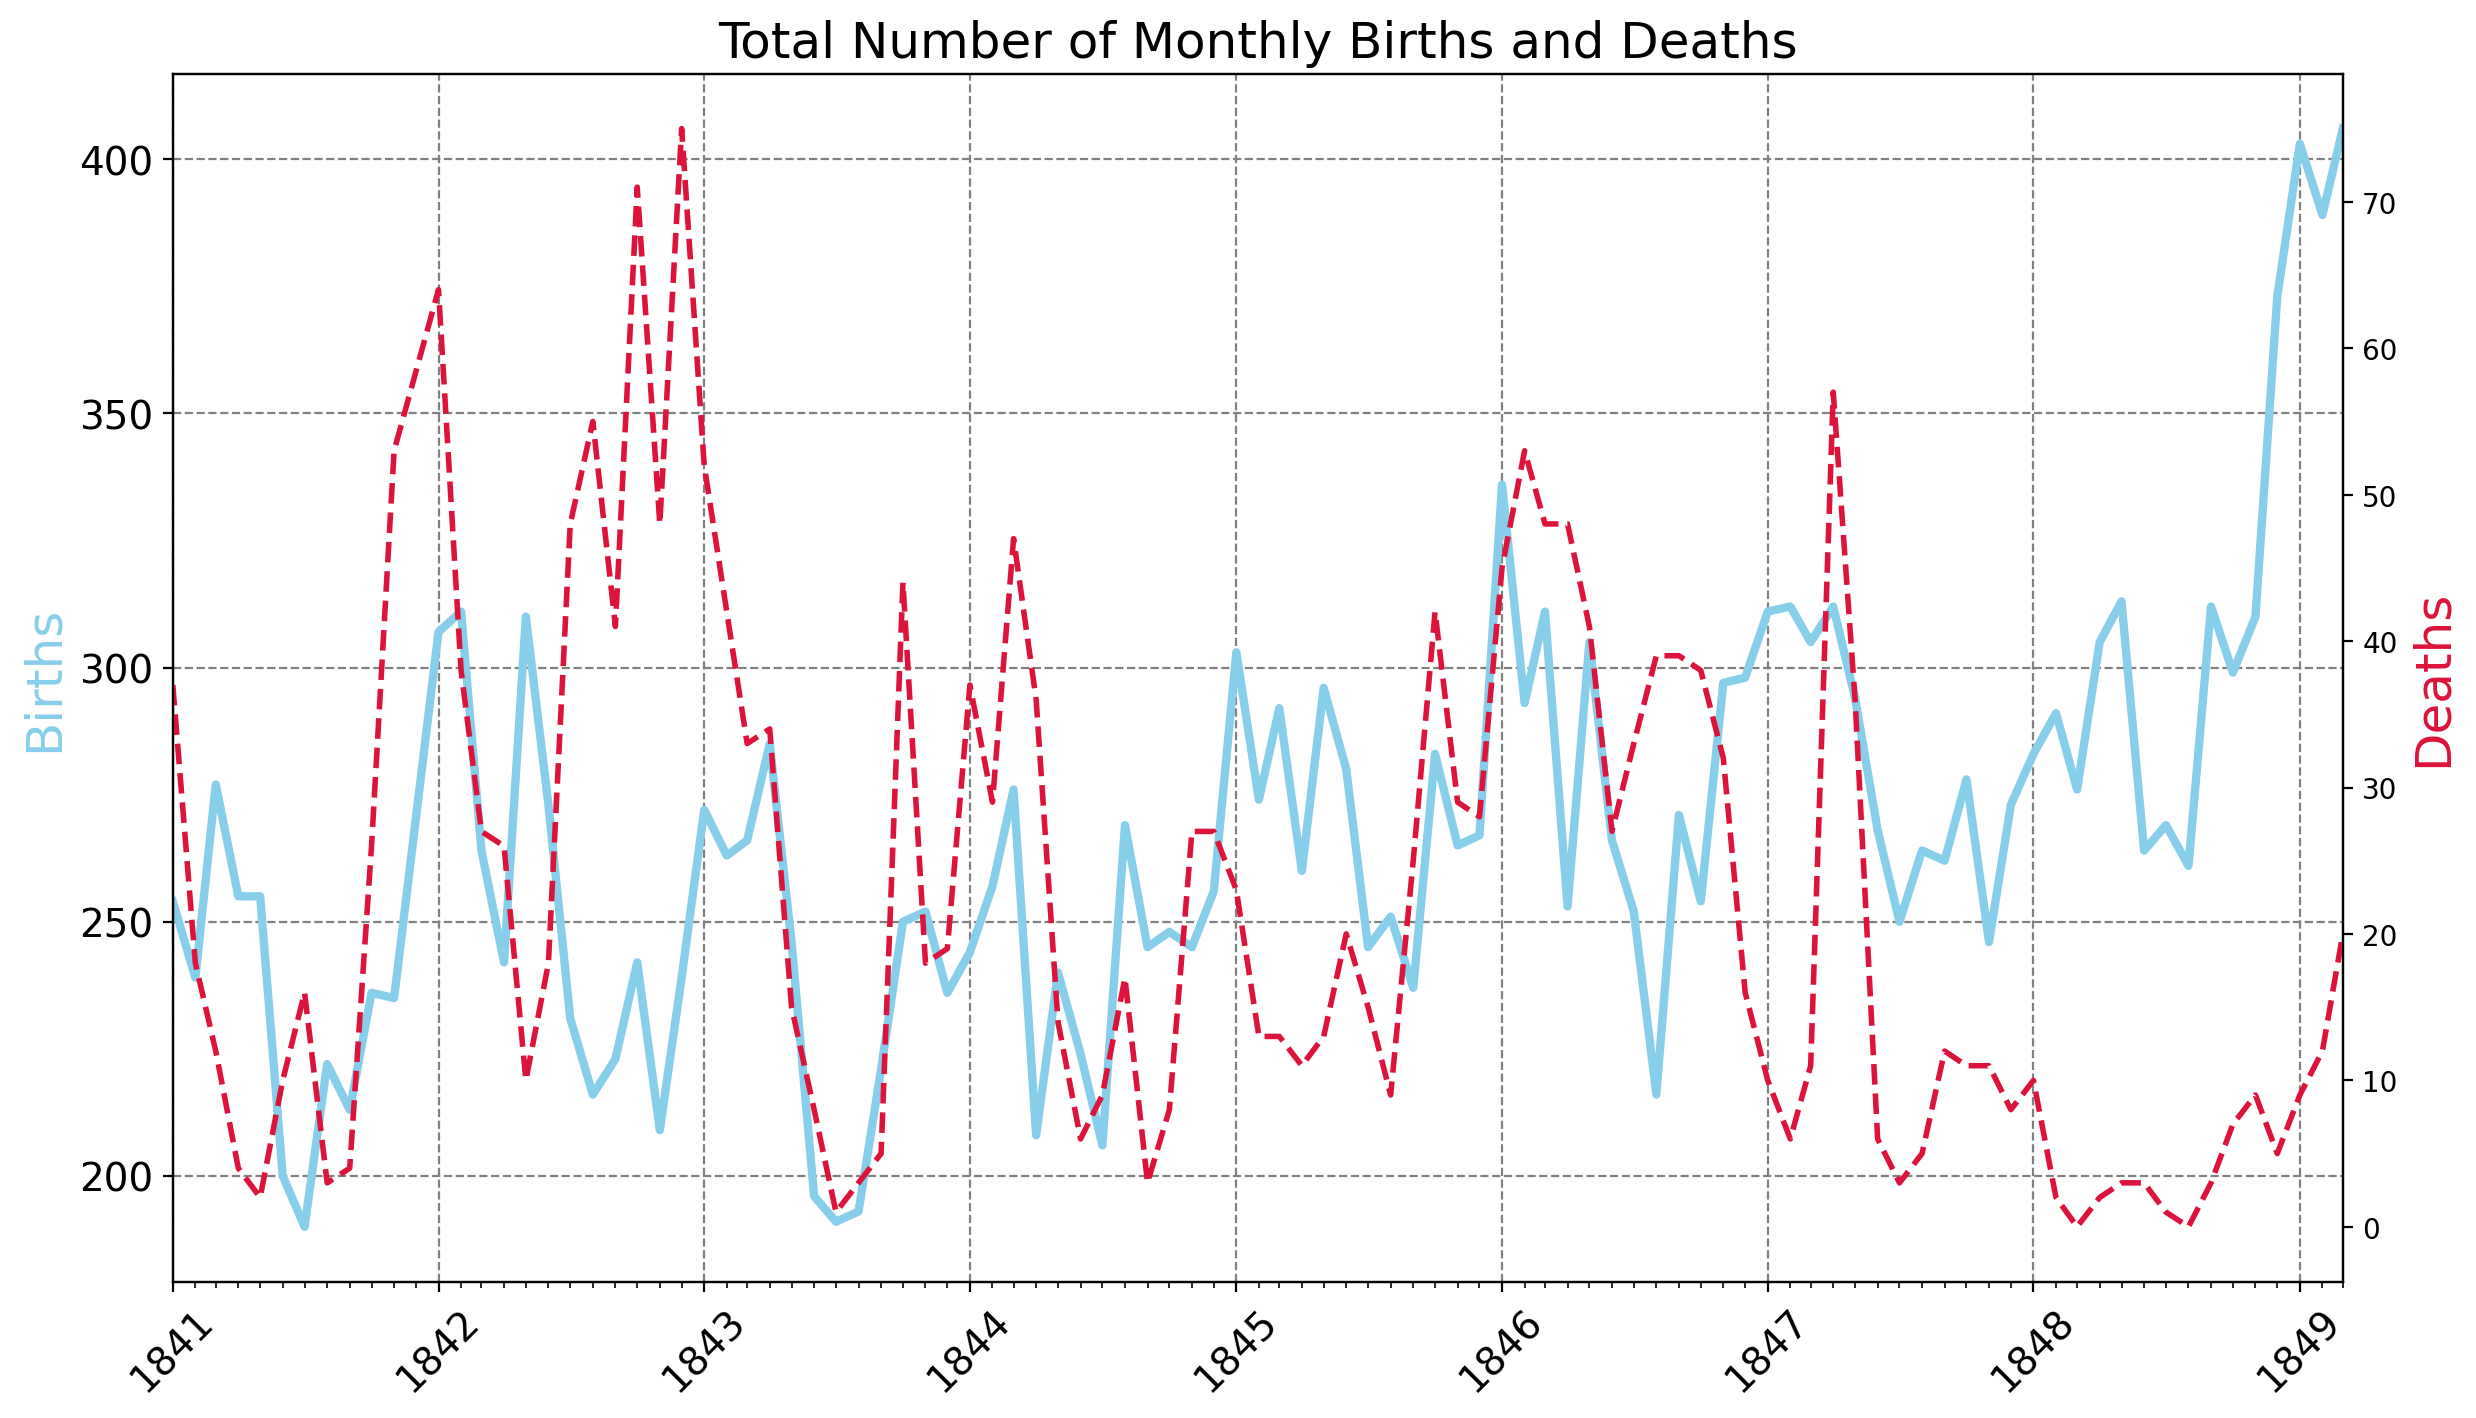

In [19]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 🤔

# Analysing the Yearly Data Split By Clinic

Welcome to your workplace...

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

# The Yearly Data Split by Clinic

Let's turn our attention to the annual data. Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.

Which clinic is bigger or more busy judging by the number of births?

Has the hospital had more patients over time?

What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [21]:
df_yearly.head(2)

year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1

# The first step in creating charts with plotly is to import plotly.express. This is the fastest way to create a beautiful graphic with a minimal amount of code in plotly.

In [4]:
import plotly.express as px

To show two line charts side by side we can use plotly and provide the clinic column as the color.

In [5]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

In [6]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

To compare apples and apples, we need to look at the proportion of deaths per clinic.

# Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.

Work out the percentage of deaths for each row in the df_yearly DataFrame by adding a column called "pct_deaths".

Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).

Create another plotly line chart to see how the percentage varies year over year with the two different clinics.

Which clinic has a higher proportion of deaths?

What is the highest monthly death rate in clinic 1 compared to clinic 2?



We can add a new column that has the percentage of deaths for each row like this: 

In [8]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [29]:
df_yearly.head(2)

year  births  deaths    clinic  pct_deaths
0  1841    3036     237  clinic 1    0.078063
1  1842    3287     518  clinic 1    0.157591

The average death rate for the entire time period for clinic 1 is:

In [9]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [10]:
clinic_2 = df_yearly[df_yearly.clinic == "clinic 2"]
avg_2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f"Average death rate in clinic 2 is {avg_2: .3}%")

Average death rate in clinic 2 is  3.88%


9.92%. In comparison, clinic 2 which was staffed by midwives had a much lower death rate of 3.88% over the course of the entire period. Hmm...

Once again, let's see this on a chart

In [11]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.

Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

The story continues...

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 😮

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

# The Effect of Handwashing

In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.



Add a column called "pct_deaths" to df_monthly that has the percentage of deaths per birth for each row.

Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.

Calculate the average death rate prior to June 1846.

Calculate the average death rate after June 1846.

In [13]:
df_monthly["pct_deaths"] = df_monthly.deaths / df_monthly.births
df_monthly.head(2)

date  births  deaths  pct_deaths
0 1841-01-01     254      37    0.145669
1 1841-02-01     239      18    0.075314

In [45]:
df_monthly_before = df_monthly[df_monthly.date < "	1847-06-01"]
df_monthly_before

date  births  deaths  pct_deaths
0  1841-01-01     254      37    0.145669
1  1841-02-01     239      18    0.075314
2  1841-03-01     277      12    0.043321
3  1841-04-01     255       4    0.015686
4  1841-05-01     255       2    0.007843
..        ...     ...     ...         ...
71 1847-01-01     311      10    0.032154
72 1847-02-01     312       6    0.019231
73 1847-03-01     305      11    0.036066
74 1847-04-01     312      57    0.182692
75 1847-05-01     294      36    0.122449

[76 rows x 4 columns]

In [50]:
avr_death_before = df_monthly_before.deaths.sum() / df_monthly_before.births.sum() *100
print(f"The average death percent before hand washing from 1841 till June 1847 is {avr_death_before} %")

The average death percent before hand washing from 1841 till June 1847 is 10.52577793674314 %


In [47]:
df_monthly_after = df_monthly[df_monthly.date >= "	1847-06-01"]
df_monthly_after

date  births  deaths  pct_deaths
76 1847-06-01     268       6    0.022388
77 1847-07-01     250       3    0.012000
78 1847-08-01     264       5    0.018939
79 1847-09-01     262      12    0.045802
80 1847-10-01     278      11    0.039568
81 1847-11-01     246      11    0.044715
82 1847-12-01     273       8    0.029304
83 1848-01-01     283      10    0.035336
84 1848-02-01     291       2    0.006873
85 1848-03-01     276       0    0.000000
86 1848-04-01     305       2    0.006557
87 1848-05-01     313       3    0.009585
88 1848-06-01     264       3    0.011364
89 1848-07-01     269       1    0.003717
90 1848-08-01     261       0    0.000000
91 1848-09-01     312       3    0.009615
92 1848-10-01     299       7    0.023411
93 1848-11-01     310       9    0.029032
94 1848-12-01     373       5    0.013405
95 1849-01-01     403       9    0.022333
96 1849-02-01     389      12    0.030848
97 1849-03-01     406      20    0.049261

In [49]:
avr_death_after = df_monthly_after.deaths.sum() / df_monthly_after.births.sum() *100
print(f"The average death percent before hand washing from 1841 till June 1847 is {avr_death_after} %")

The average death percent before hand washing from 1841 till June 1847 is 2.1531463229719483 %


# Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6-month rolling average death rate prior to mandatory handwashing.

To work out the moving 6-month average we first set the date column as the index. Then we can use the same Pandas functions as in the Google Trends notebook.

In [30]:
# # You can create a rolling average using .rolling() and .mean() functions together.

In [31]:
roll_df = df_monthly_before.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

# Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). 

Add 3 separate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.

Show the monthly death rate before handwashing as a thin dashed black line.

Show the moving average as a thicker, crimson line.

Show the rate after handwashing as a skyblue line with round markers.

Look at the code snippet in the documentation to see how you can add a legend to the chart.

After copy-pasting the previous code for the Matplotlib chart, we just need to change a few things. First, we remove the twin axes. And instead, we plot the three different lines on the same axis. To create the legend, we supply a label to the .plot() function and capture return value in a variable. It's important to notice that .plot() returns more than one thing, so we need to use a comma (,) since we're only grabbing the first item. We can then feed these handles into plt.legend().

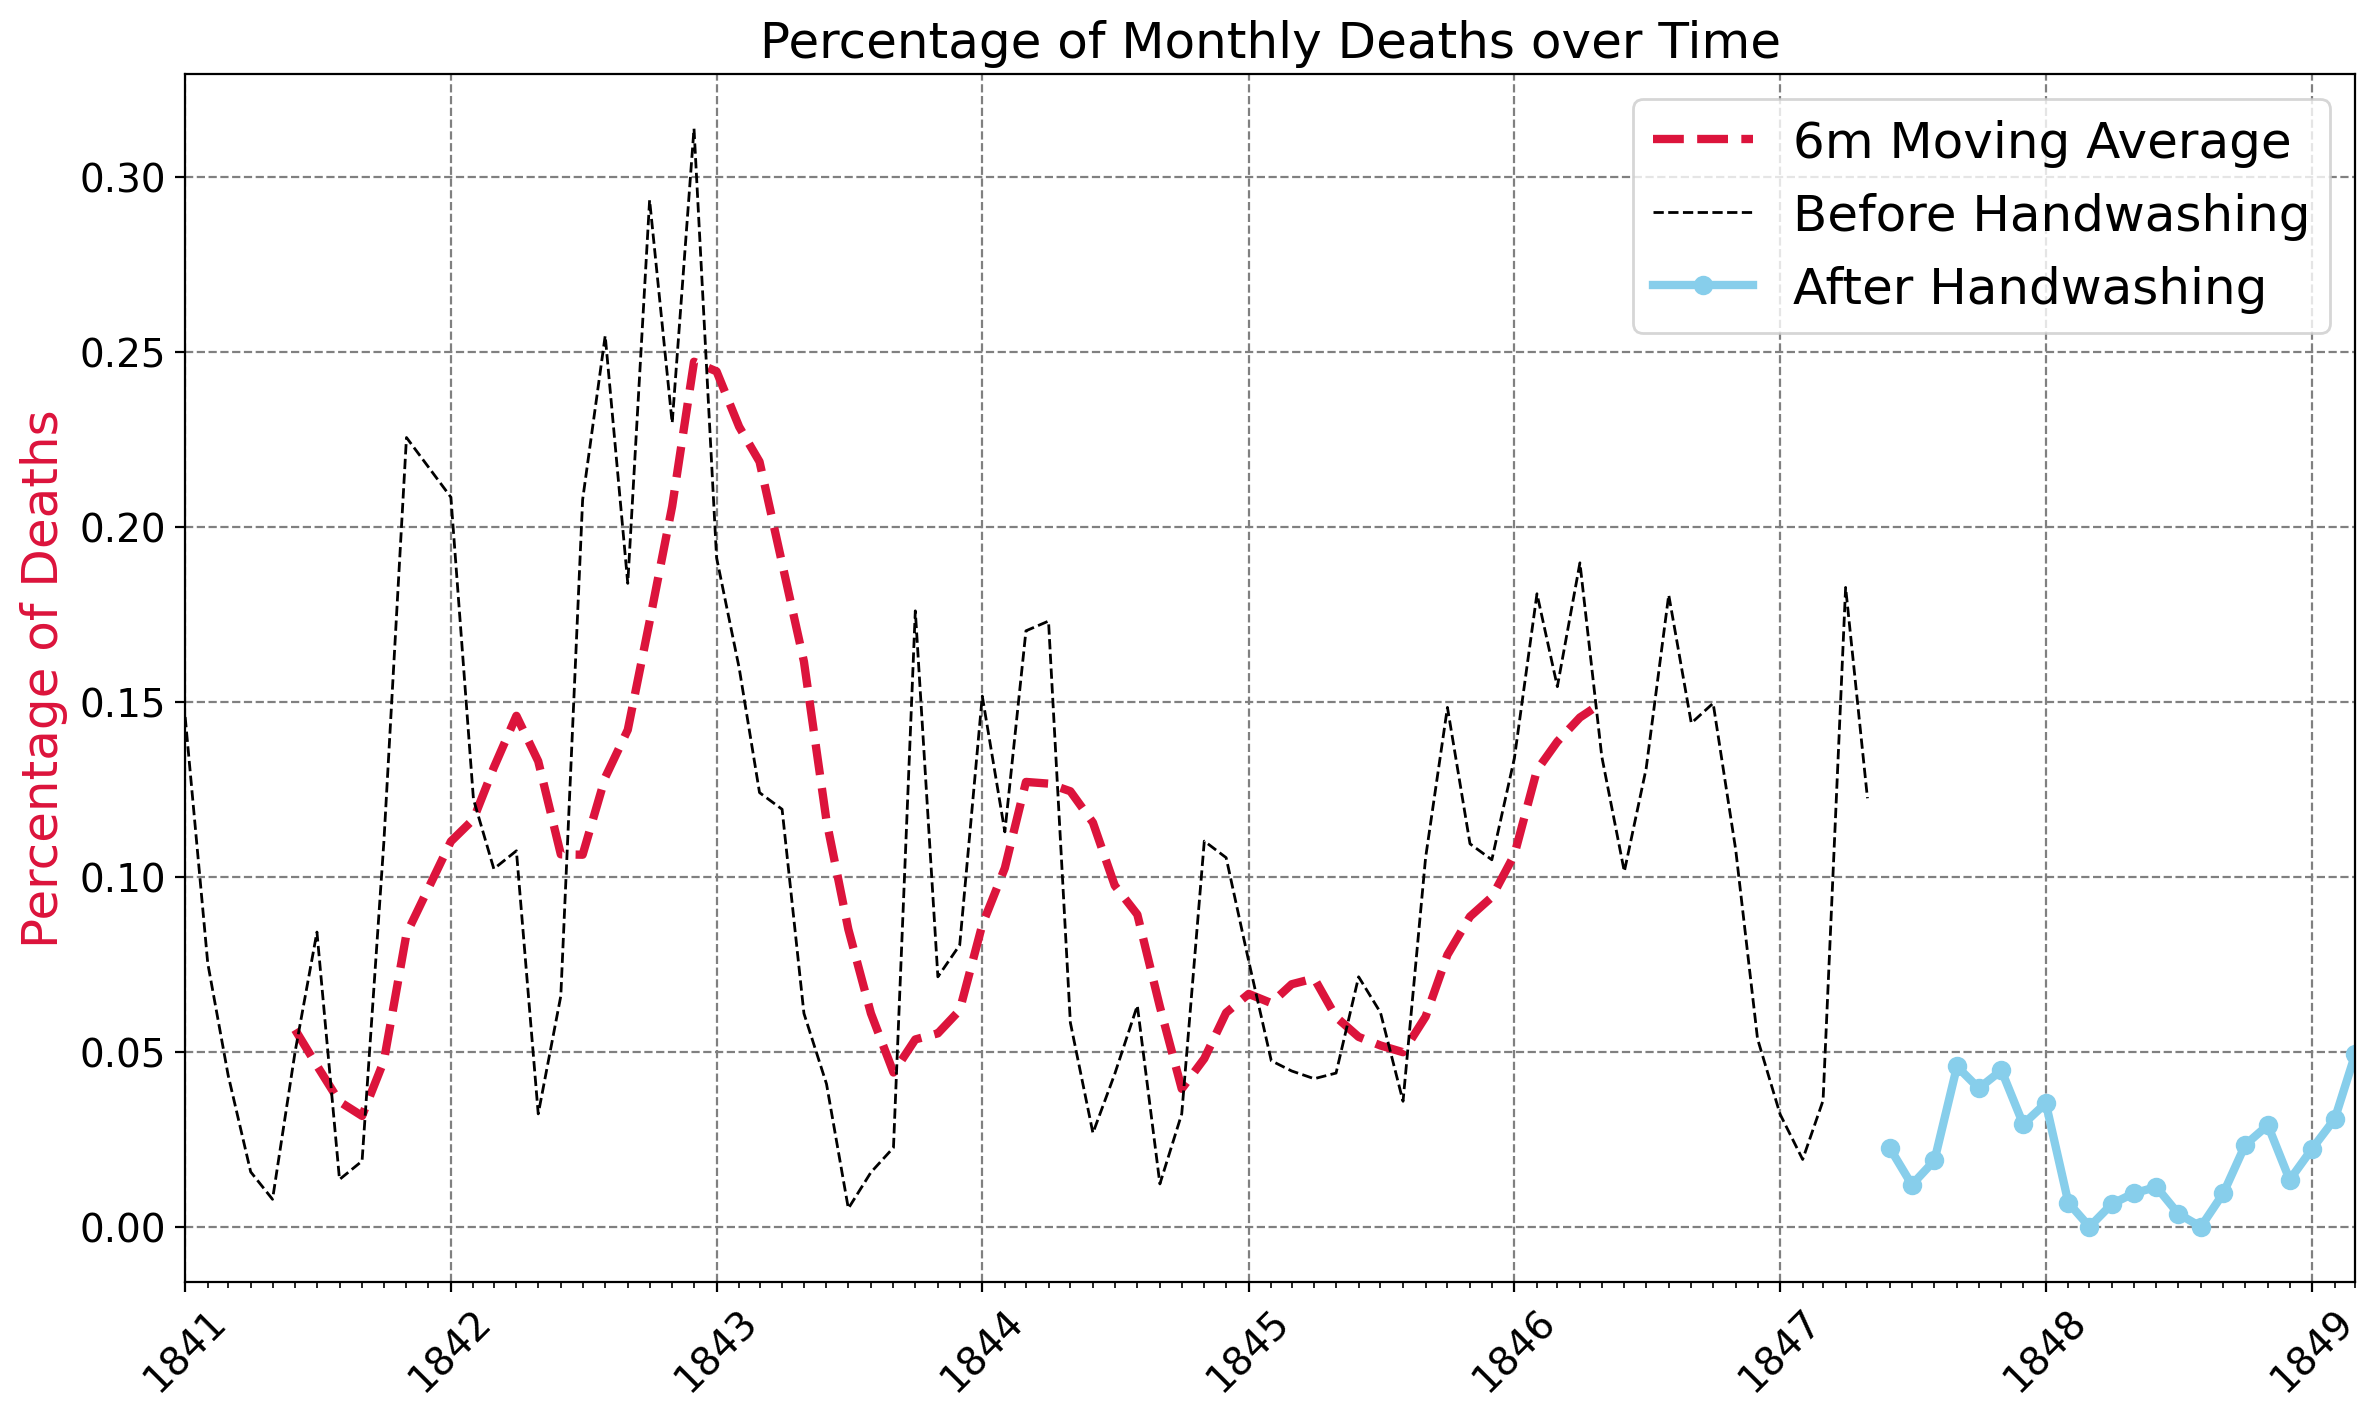

In [51]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_monthly_before.date, 
                    df_monthly_before.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(df_monthly_after.date, 
                    df_monthly_after.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

# Visualising Distributions and Testing for Statistical Significance

There are even more powerful arguments we can make to convince our fellow doctors in clinic 1 of the virtues of handwashing. The first are statistics regarding the mean monthly death rate. The second are compelling visualisations to accompany the statistics.

# Calculate the Difference in the Average Monthly Death Rate

What was the average percentage of monthly deaths before handwashing (i.e., before June 1847)?

What was the average percentage of monthly deaths after handwashing was made obligatory?

By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?

How do these numbers compare to the average for all the 1840s that we calculated earlier?

How many times lower are the chances of dying after handwashing compared to before?

A lot of statistical tests rely on comparing features of distributions, like the mean. We see that the average death rate before handwashing was 10.5%. After handwashing was made obligatory, the average death rate was 2.11%. The difference is massive. Handwashing decreased the average death rate by 8.4%, a 5x improvement. 

In [58]:
avg_prob_before = df_monthly_before.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = df_monthly_after.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 2.11%.
Handwashing reduced the monthly proportion of deaths by 8.4%!
This is a 5.0x improvement!


# Box Plots

# Using Box Plots to Show How the Death Rate Changed Before and After Handwashing

The statistic above is impressive, but how do we show it graphically? With a box plot we can show how the quartiles, minimum, and maximum values changed in addition to the mean.

Use NumPy's .where() function to add a column to df_monthly that shows if a particular date was before or after the start of handwashing.

Then use plotly to create box plot of the data before and after handwashing.

How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy



In [60]:
import numpy as np

The easiest way to create a box plot is to have a column in our DataFrame that shows the rows' "category" (i.e., was it before or after obligatory handwashing). NumPy allows us to easily test for a condition and add a column of data.

In [61]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [62]:
df_monthly

date  births  deaths  pct_deaths washing_hands
0  1841-01-01     254      37    0.145669            No
1  1841-02-01     239      18    0.075314            No
2  1841-03-01     277      12    0.043321            No
3  1841-04-01     255       4    0.015686            No
4  1841-05-01     255       2    0.007843            No
..        ...     ...     ...         ...           ...
93 1848-11-01     310       9    0.029032           Yes
94 1848-12-01     373       5    0.013405           Yes
95 1849-01-01     403       9    0.022333           Yes
96 1849-02-01     389      12    0.030848           Yes
97 1849-03-01     406      20    0.049261           Yes

[98 rows x 5 columns]

Now we can use plotly:

In [64]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

# Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a plotly histogram to show the monthly percentage of deaths.

Use docs to check out the available parameters. Use the color parameter to display two overlapping histograms.

The time period of handwashing is shorter than not handwashing. Change histnorm to percent to make the time periods comparable.

Make the histograms slightly transparent

Experiment with the number of bins on the histogram. Which number works well in communicating the range of outcomes?

Just for fun, display your box plot on the top of the histogram using the marginal parameter



To create our histogram, we once again make use of the color parameter. This creates two separate histograms for us. When we set the opacity to 0.6 or so we can clearly see how the histograms overlap. The trick to getting a sensible-looking histogram when you have a very different number of observations is to set the histnorm to 'percent'. That way the histogram with more observations won't completely overshadow the shorter series.

In [66]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

# Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

Use Seaborn's .kdeplot() to create two kernel density estimates of the pct_deaths, one for before handwashing and one for after.

Use the shade parameter to give your two distributions different colours.

What weakness in the chart do you see when you just use the default parameters?

Use the clip parameter to address the problem.



To create two bell-shaped curves of the estimated distributions of the death rates we just call .kdeplot() twice.

# Import Seaborn

In [69]:
import seaborn as sns
# To create two bell-shaped curves of the estimated distributions of the death rates we just call .kdeplot() twice.

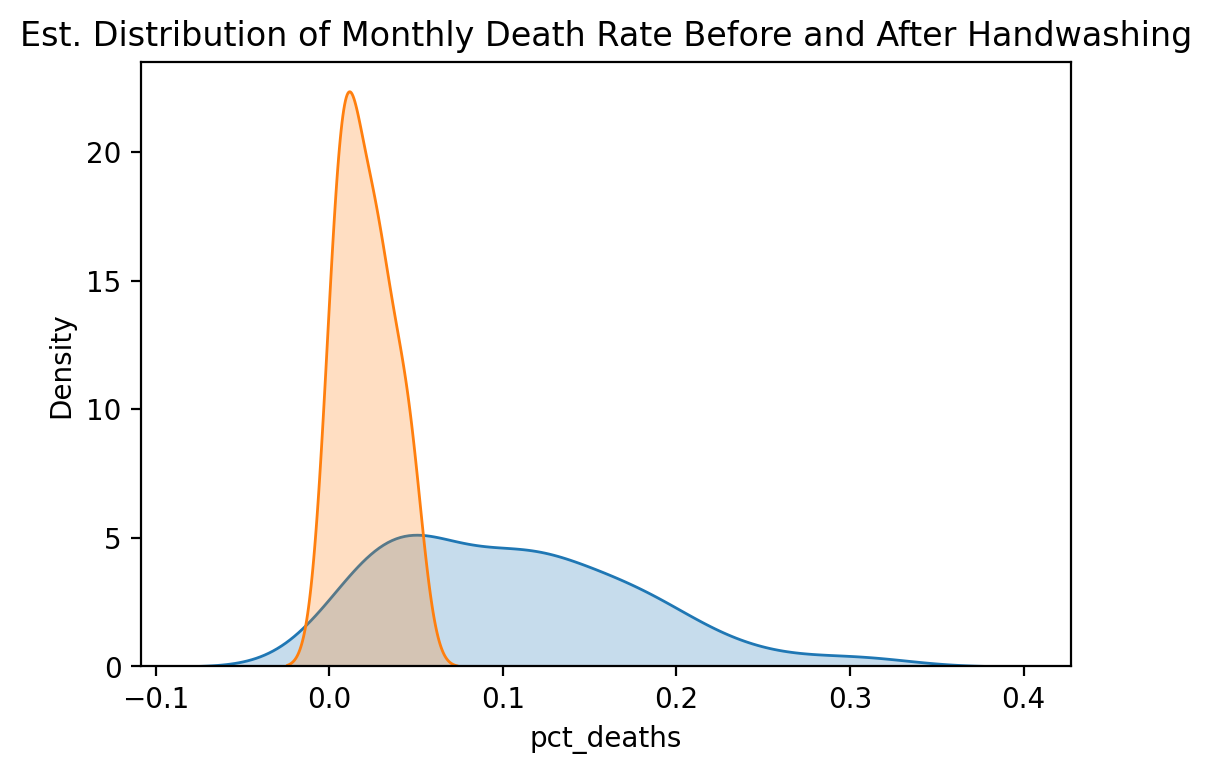

In [70]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(df_monthly_before.pct_deaths, shade=True)
sns.kdeplot(df_monthly_after.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The doctors would be very surprised indeed if a corpse came back to life after an autopsy!

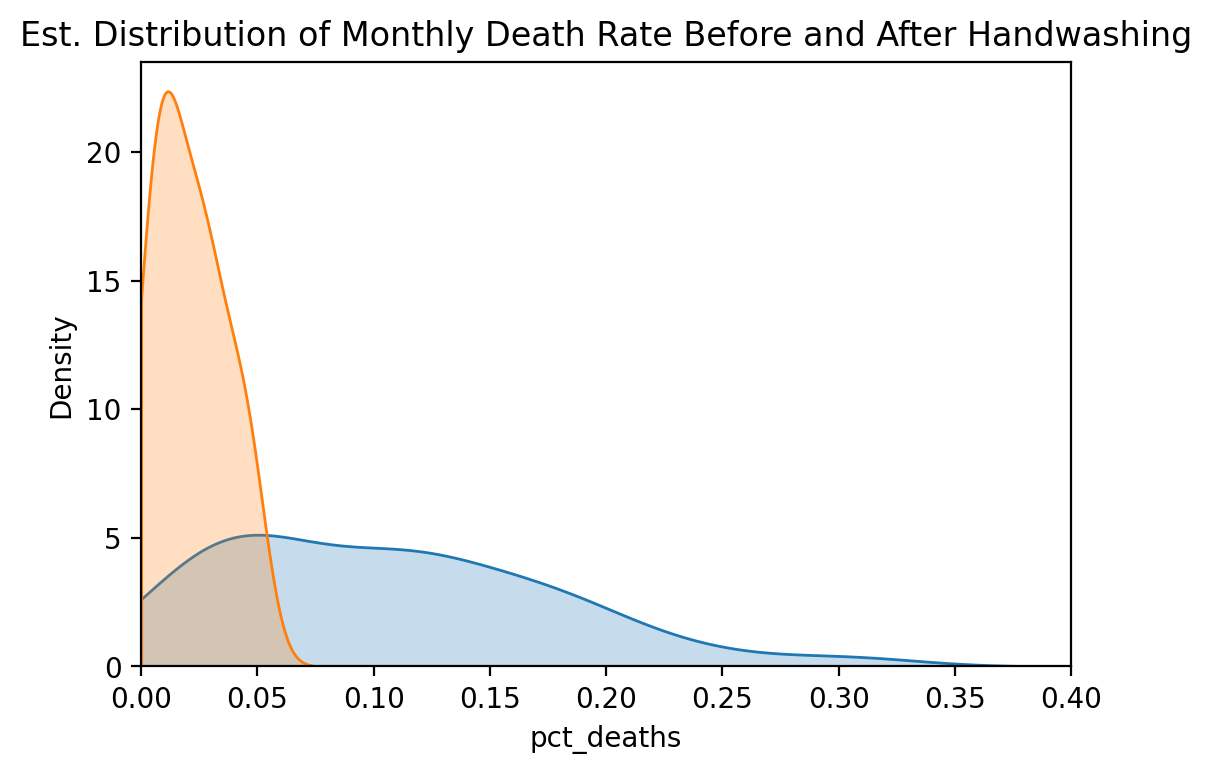

In [71]:
# The solution is to specify a lower bound of 0 for the death rate.

plt.figure(dpi=200)
sns.kdeplot(df_monthly_before.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(df_monthly_after.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.

# Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

Import stats from scipy

Use the .ttest_ind() function to calculate the t-statistic and the p-value

Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?

# The first step is to import stats from scipy

In [72]:
import scipy.stats as stats

When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper

In [74]:
t_stat, p_value = stats.ttest_ind(a=df_monthly_before.pct_deaths, 
                                  b=df_monthly_after.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512
